In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

flights = pd.read_csv(url1, sep=',')
weather = pd.read_csv(url2, sep=',')

Исследование 1. Зависимость количества полетов от месяца. 

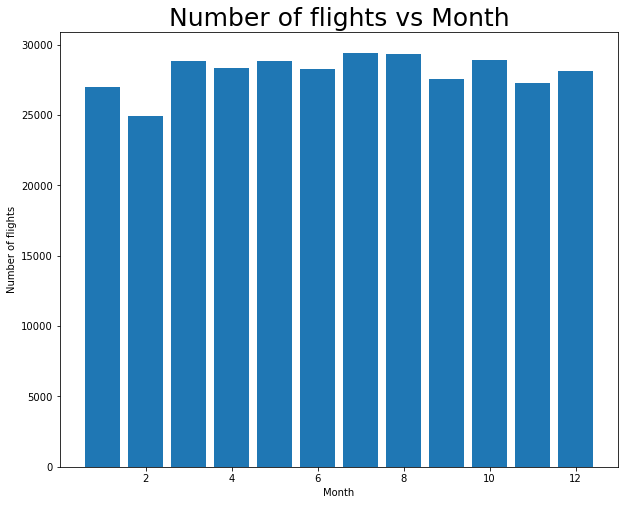

In [38]:
flight_attraction_month = flights.groupby('month')['Unnamed: 0']
arr = flight_attraction_month.count()
plt.figure(figsize=(10,8))
plt.bar(arr.index, arr)
plt.xlabel('Month')
plt.ylabel('Number of flights')
plt.title('Number of flights vs Month', size=25)
plt.show()

Вывод: количество полетов во все месяцы практически одинаково, чуть больше в июле-августе, чуть меньше в феврале.

Исследование 2. Связь между количеством задержек и месяцами. 

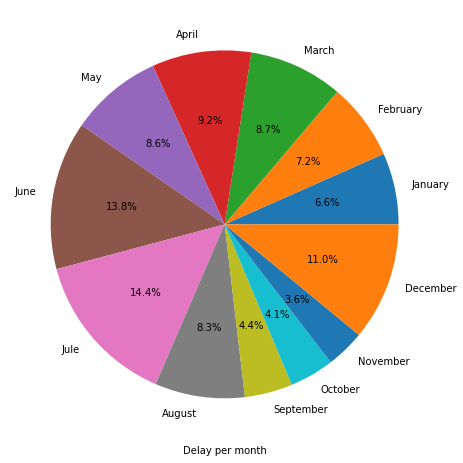

In [37]:
month_flights = flights.groupby("month")
delay = month_flights['dep_delay'].mean()
labels = ["January", "February", "March", "April", "May", "June", "Jule", "August",
          "September", "October", "November", "December" ]
plt.figure(figsize=(10,8))
plt.pie(delay, labels = labels, autopct='%1.1f%%')
plt.xlabel("Delay per month")
plt.show()

Вывод. Наибольшее количество задержек в июне,июле и декабре. 

Исследование 3. Зависимость задержек от времени суток.

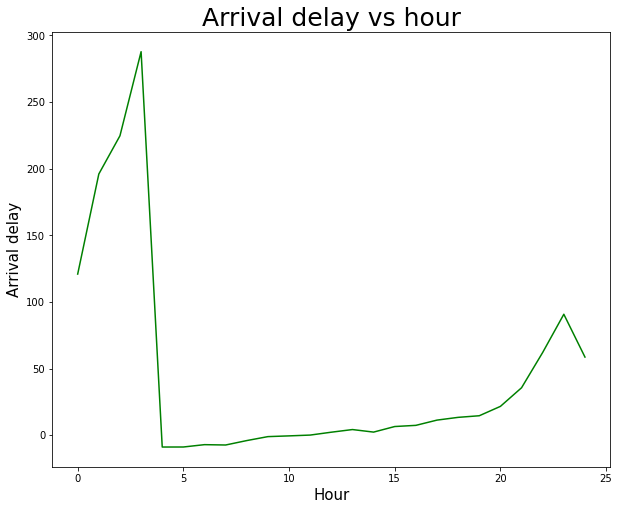

In [39]:
arrival_del = flights.dropna(subset=['arr_delay'])
arrival_del['arr_delay'].abs()
arrival_del = arrival_del.groupby('hour')['arr_delay'].mean()
plt.figure(figsize=(10,8))
plt.plot(arrival_del.index, arrival_del, c='green')
plt.xlabel('Hour', size=15)
plt.ylabel('Arrival delay', size=15)
plt.title('Arrival delay vs hour', size=25)
plt.show()

Вывод. Самое большое количество задержек происходит ночью с полуночи до трех.

Исследование 4. Теперь будем исследовать количество задержек в зависимости от погодных условий. Например, зависимость от температуры. 

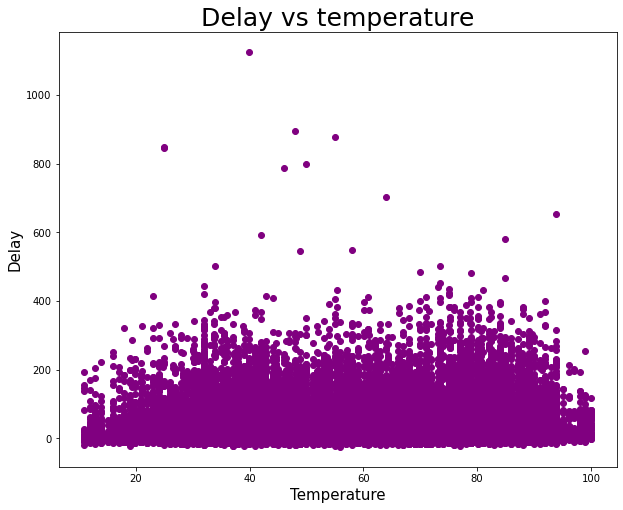

In [35]:
flight_weather = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )
plt.figure(figsize=(10,8))
plt.scatter(flight_weather['temp'], flight_weather['dep_delay'], c='purple')
plt.xlabel('Temperature', size=15)
plt.ylabel('Delay', size=15)
plt.title('Delay vs temperature', size=25)
plt.show()

Вывод. Из графика видно, что количество задержек не зависит от температуры.

Исследование 5. Зависимость количества задержек от скорости ветра.  

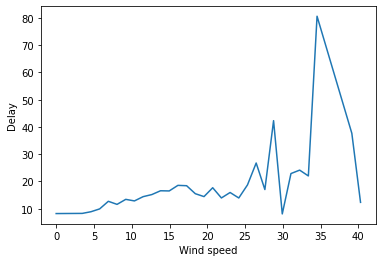

In [14]:
df=flights.merge(weather,on=['year','month','day','hour'],how='inner')
p=df.loc[:, ['dep_delay','wind_speed']].groupby('wind_speed').mean()
plt.plot(list(p.index[:-1]),list(p['dep_delay'])[:-1])
plt.xlabel('Wind speed')
plt.ylabel('Delay')
plt.show()

Вывод. Чем выше скорость, тем более вероятно, что задержка будет более продлжительной.

Исследование 6. Связь задержки и влажности воздуха.

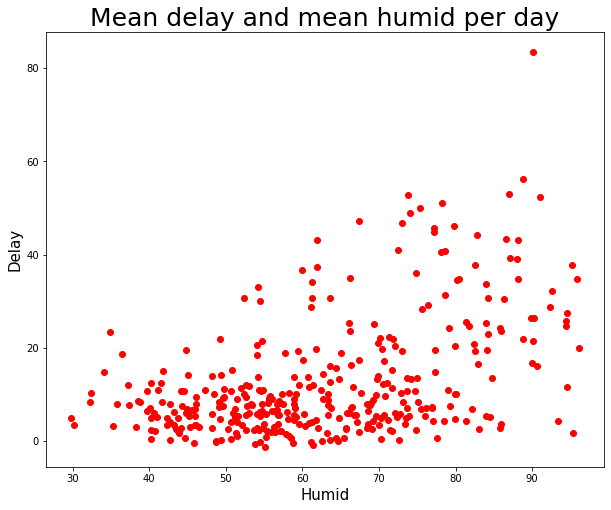

In [25]:
plt.figure(figsize=(10,8))
humid = flight_weather.groupby(['month', 'day'])['humid'].mean()
rand = np.random.choice(336776, 365)
delay = flights.groupby(['month', 'day'])['dep_delay'].mean()
delay_correct = delay.drop(labels = [delay.index[-1]])
plt.scatter(humid, delay_correct, c='red')
plt.xlabel('Humid', size=15)
plt.ylabel("Delay", size=15)
plt.title('Mean delay and mean humid per day', size=25)
plt.show()

Вывод. Чем больше влажность, тем дольше задержка.

Исследование 7. Зависимость количества задержек от давления.

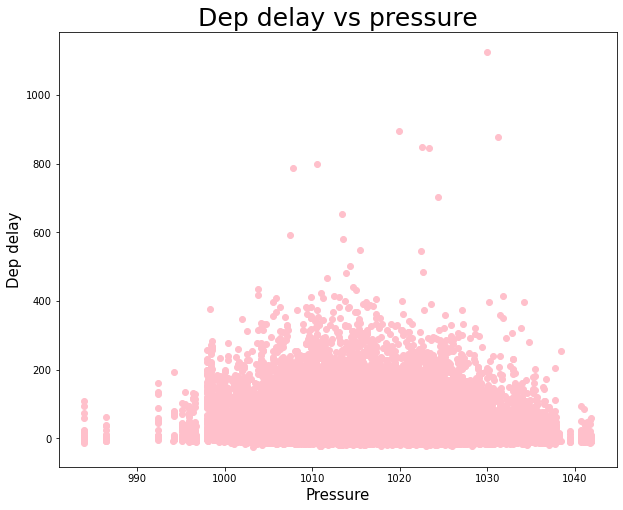

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(flight_weather['pressure'], flight_weather['dep_delay'], c='pink')
plt.xlabel('Pressure', size=15)
plt.ylabel('Dep delay', size=15)
plt.title('Dep delay vs pressure', size=25)
plt.show()

Вывод. Количество задержек не зависит от давления.